In [11]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

import calc_wbgt

# WBGTを計算する例題

In [12]:
# Example data
dry_bulb_temperature = np.arange(start=20, stop=41, step=1, dtype=float)  # Celsius
relative_humidity = np.arange(start=40, stop=100, step=20, dtype=float)  # Percentage
globe_temperature = np.arange(start=25, stop=60, step=10, dtype=float)  # Celsius
velocity = np.arange(start=0.5, stop=2.5, step=0.5, dtype=float)  # m/s

In [13]:
# 全組み合わせの計算
dry_bulb_temperature_, relative_humidity_, globe_temperature_, velocity_ = np.meshgrid(
    dry_bulb_temperature, relative_humidity, globe_temperature, velocity
)

print(dry_bulb_temperature_.shape)

(3, 21, 4, 4)


In [14]:
# Calculate WBGT
results = [calc_wbgt.calc_wbgt(
    dry_bulb_temperature=t,
    relative_humidity=h,
    velocity=v,
    globe_temperature=t_g,
    is_sunstrike=False
    ) for t, h, t_g, v in zip(
        dry_bulb_temperature_.ravel(),
        relative_humidity_.ravel(),
        globe_temperature_.ravel(),
        velocity_.ravel()
        )
    ]

natural_wet_bulb_temperature, wbgt = zip(*results)

In [15]:
# DataFrameに変換
df_result = pd.DataFrame(columns=[
    'dry_bulb_temperature',
    'relative_humidity',
    'globe_temperature',
    'velocity',
    'natural_wet_bulb_temperature',
    'wbgt'])

df_result['dry_bulb_temperature'] = dry_bulb_temperature_.ravel()
df_result['relative_humidity'] = relative_humidity_.ravel()
df_result['globe_temperature'] = globe_temperature_.ravel()
df_result['velocity'] = velocity_.ravel()
df_result['natural_wet_bulb_temperature'] = natural_wet_bulb_temperature
df_result['wbgt'] = wbgt

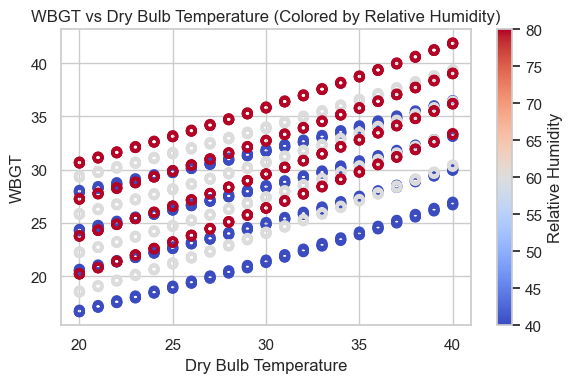

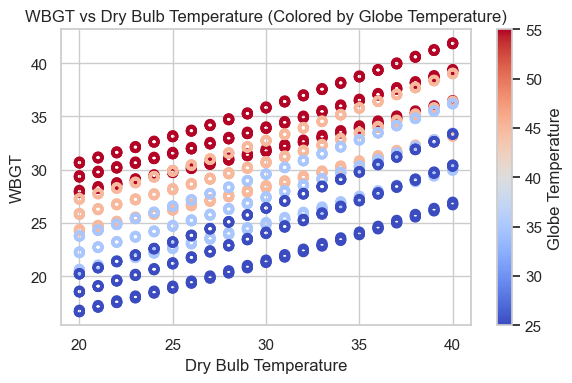

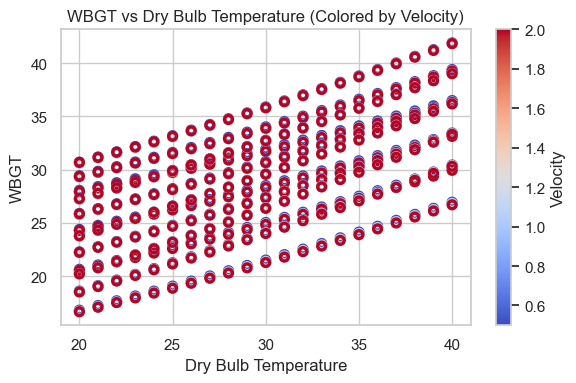

In [16]:
# seabornのテーマを設定
sns.set(style="whitegrid")

# 1. relative_humidity による散布図
plt.figure(figsize=(6, 4))
plt.scatter(df_result['dry_bulb_temperature'], df_result['wbgt'], 
            c=df_result['relative_humidity'], cmap='coolwarm', s=50, marker="$\circ$", ec="face")
plt.title('WBGT vs Dry Bulb Temperature (Colored by Relative Humidity)')
plt.xlabel('Dry Bulb Temperature')
plt.ylabel('WBGT')
plt.colorbar(label='Relative Humidity')
plt.tight_layout()
plt.show()

# 2. globe_temperature による散布図
plt.figure(figsize=(6, 4))
plt.scatter(df_result['dry_bulb_temperature'], df_result['wbgt'], 
            c=df_result['globe_temperature'], cmap='coolwarm', s=50, marker="$\circ$", ec="face")
plt.title('WBGT vs Dry Bulb Temperature (Colored by Globe Temperature)')
plt.xlabel('Dry Bulb Temperature')
plt.ylabel('WBGT')
plt.colorbar(label='Globe Temperature')
plt.tight_layout()
plt.show()

# 3. velocity による散布図
plt.figure(figsize=(6, 4))
plt.scatter(df_result['dry_bulb_temperature'], df_result['wbgt'], 
            c=df_result['velocity'], cmap='coolwarm', s=50, marker="$\circ$", ec="face")
plt.title('WBGT vs Dry Bulb Temperature (Colored by Velocity)')
plt.xlabel('Dry Bulb Temperature')
plt.ylabel('WBGT')
plt.colorbar(label='Velocity')
plt.tight_layout()
plt.show()